In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [147]:
data = pd.read_csv('wdbc.csv')
print(data.shape)
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 1. Visualiser les boxplot de chacun des attributs [1 à 10]- Commenter

Text(0.5, 1.0, 'Diagnosis vs radius_mean')

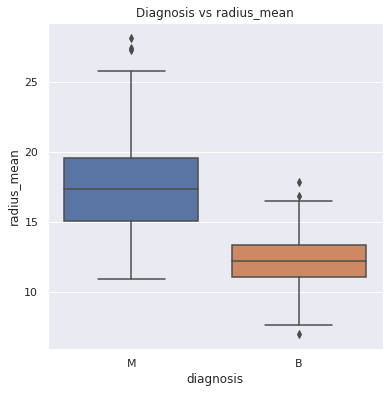

In [148]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = data)
plt.title('Diagnosis vs radius_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont un rayon plus grand que les cellules bénignes en général

Text(0.5, 1.0, 'Diagnosis vs texture_mean')

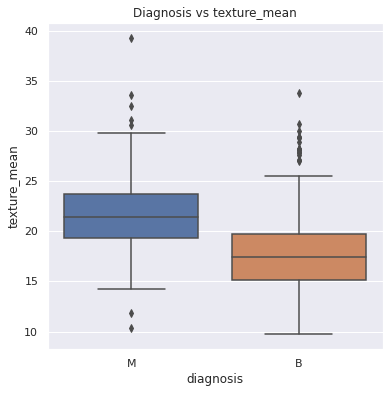

In [149]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'texture_mean', data = data)
plt.title('Diagnosis vs texture_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une texture plus grande que les cellules bénignes en général

Text(0.5, 1.0, 'Diagnosis vs perimeter_mean')

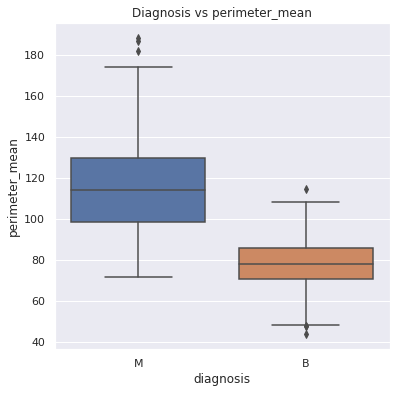

In [150]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'perimeter_mean', data = data)
plt.title('Diagnosis vs perimeter_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont un périmètre plus grand que les cellules bénignes en général

Text(0.5, 1.0, 'Diagnosis vs area_mean')

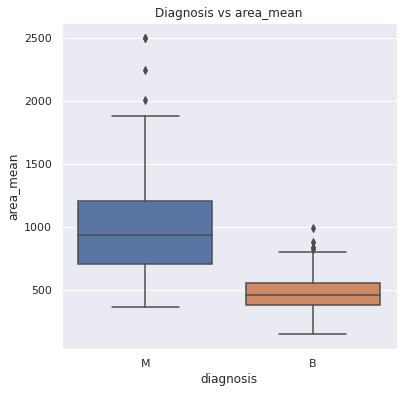

In [151]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'area_mean', data = data)
plt.title('Diagnosis vs area_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une plus grande surface que les cellules bénignes en général


Text(0.5, 1.0, 'Diagnosis vs smoothness_mean')

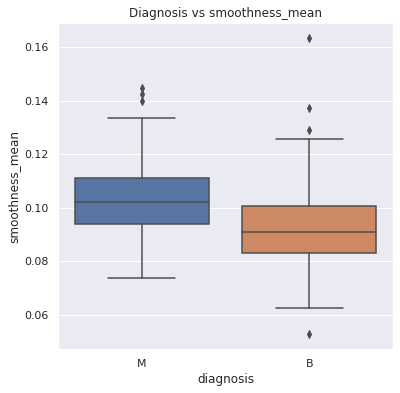

In [152]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = data)
plt.title('Diagnosis vs smoothness_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une douceur légèrement supérieure à celle des cellules bénignes en général


Text(0.5, 1.0, 'Diagnosis vs compactness_mean')

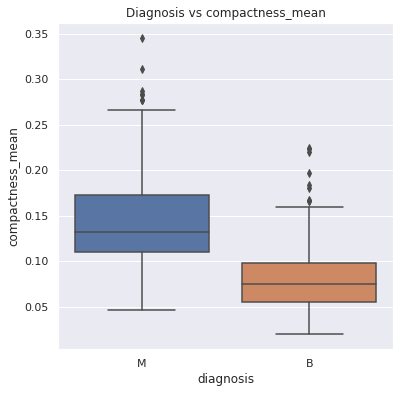

In [153]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'compactness_mean', data = data)
plt.title('Diagnosis vs compactness_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une plus grande compacité que les cellules bénignes en général

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

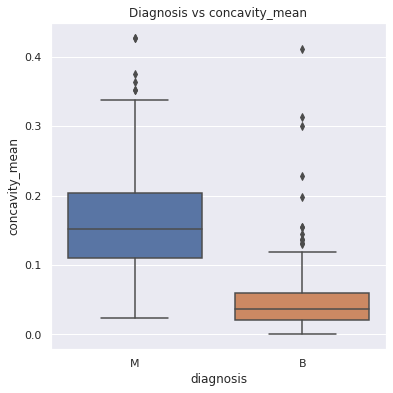

In [154]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'concavity_mean', data = data)
plt.title('Diagnosis vs concavity_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une plus grande concavité que les cellules bénignes en général


Text(0.5, 1.0, 'Diagnosis vs concave points_mean')

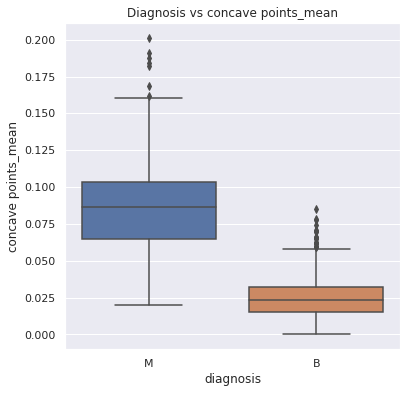

In [155]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'concave points_mean', data = data)
plt.title('Diagnosis vs concave points_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont des points concaves beaucoup plus importants que les cellules bénignes en général


Text(0.5, 1.0, 'Diagnosis vs symmetry_mean')

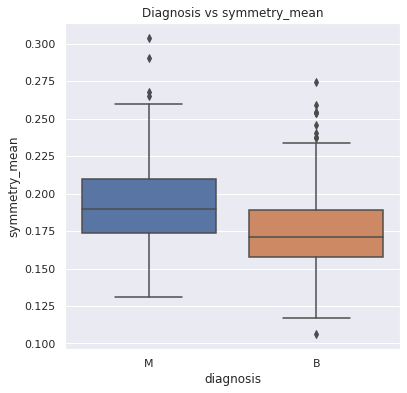

In [156]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'symmetry_mean', data = data)
plt.title('Diagnosis vs symmetry_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une symétrie légèrement supérieure à celle des cellules bénignes en général

Text(0.5, 1.0, 'Diagnosis vs fractal_dimension_mean')

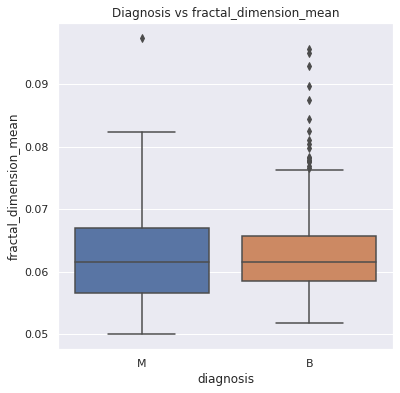

In [157]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = data)
plt.title('Diagnosis vs fractal_dimension_mean')

A partir du graphique, nous pouvons voir que les cellules malignes ont une moyenne de dimension fractale presque égale à celle des cellules bénignes en général


# 2, 3. Visualiser le correlation heatmap et commenter.

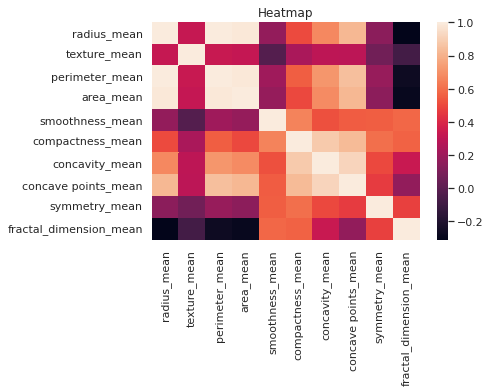

In [158]:
data_corr = data[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]].corr()
sns.set()
ax = sns.heatmap(data_corr)
plt.title("Heatmap")
plt.show()

# 4. Visualiser les boxplot de chacun des attributs après ACP.

In [159]:
dat = data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]]
cov_matrix = np.cov(np.transpose(dat))
eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)
df = pd.DataFrame(eigh_vec.transpose())
print(eigh_vec)
print(df)
df['eigh_val'] = eigh_val
df = df.sort_values(by='eigh_val', ascending=False)
df = df[:3]
df

[[-3.72624472e-03  9.84212901e-03 -4.25638328e-02 -8.16930747e-02
   1.77371065e-02  2.59557594e-01 -9.52456868e-01 -1.02430130e-01
   7.71733355e-02  9.86506263e-03]
 [ 5.68074745e-05 -1.43204484e-04  3.82002758e-04 -3.07158531e-04
   5.05204118e-04 -1.63492248e-04 -4.44552782e-03  6.27854123e-01
   7.78308136e-01  3.91622030e-03]
 [ 1.11790686e-03 -2.18634818e-03  6.73819746e-03  1.35559677e-02
  -2.99753113e-03 -3.99397505e-02  1.21414104e-01 -7.69858242e-01
   6.21384301e-01  6.79638629e-02]
 [-2.26319097e-05  9.79109381e-06 -5.03987584e-05 -7.94407723e-05
   5.86140094e-05 -2.17655315e-05  1.11368075e-03  5.09958616e-02
  -4.61513749e-02  9.97631304e-01]
 [-7.09498781e-02 -6.96664884e-01  5.74268877e-01 -3.60130821e-01
   1.87252866e-01  1.17991379e-01  3.40436069e-02 -7.77065305e-04
   1.77517030e-04  7.06404442e-06]
 [-1.49169590e-01  1.07701997e-01 -4.99166821e-01 -7.55315134e-01
   2.29761299e-01  2.58301377e-01  1.64145250e-01 -3.59197386e-03
   3.71753572e-03  7.46807957e-05

,0,1,2,3,4,5,6,7,8,9,eigh_val
9,0.009865,0.003916,0.067964,0.997631,0.000007,0.000075,0.000155,0.000091,0.000012,-0.000006,124432.264054
8,0.077173,0.778308,0.621384,-0.046151,0.000178,0.003718,0.003920,0.001504,0.000909,0.000124,17.664362
7,-0.102430,0.627854,-0.769858,0.050996,-0.000777,-0.003592,-0.002742,-0.001686,-0.001045,-0.000134,14.941853


In [160]:
#convert DataFrame to NumPy array
A = df.drop(columns = ['eigh_val'],axis = 1).to_numpy()
dat_ = data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]]
new_df = np.dot(A, np.transpose(dat_))
new_columns = ['e1', 'e2', 'e3']
new_results = pd.DataFrame(np.transpose(new_df), columns = new_columns)
new_results['diagnosis'] = data['diagnosis']
new_results

,e1,e2,e3,diagnosis
0,1007.193105,39.578333,-38.819750,M
1,1332.164050,36.804167,-25.644570,M
2,1209.263281,43.320222,-27.410140,M
3,390.650626,47.133621,-28.412440,M
4,1303.366093,36.819088,-30.942566,M
...,...,...,...,...
564,1485.448004,39.070643,-22.049324,M
565,1267.239192,46.870720,-21.025857,M
566,863.701665,50.830384,-23.687245,M
567,1271.843512,53.094883,-27.045040,M


Text(0.5, 1.0, 'Diagnosis vs e1')

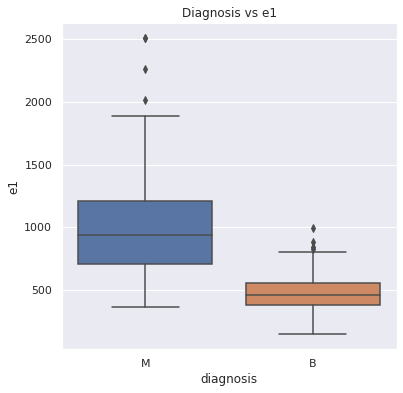

In [161]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'e1', data = new_results)
plt.title('Diagnosis vs e1')

Text(0.5, 1.0, 'Diagnosis vs e2')

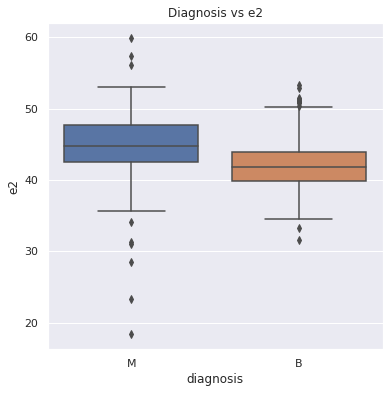

In [162]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'e2', data = new_results)
plt.title('Diagnosis vs e2')

Text(0.5, 1.0, 'Diagnosis vs e3')

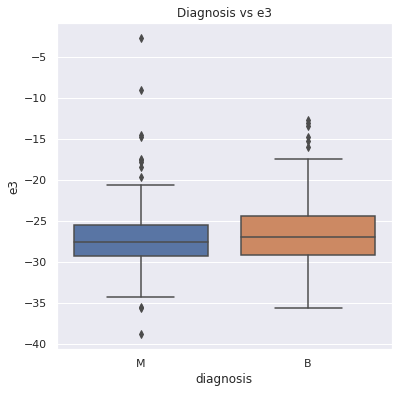

In [163]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'diagnosis', y = 'e3', data = new_results)
plt.title('Diagnosis vs e3')

# 5. Visualiser le correlation heatmap

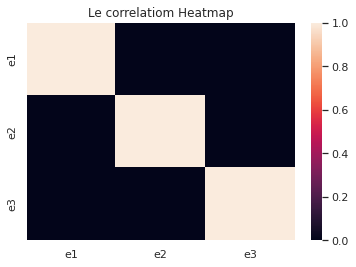

In [164]:
data_corr = new_results.drop(columns = ['diagnosis'],axis = 1).corr()
sns.set()
ax = sns.heatmap(data_corr)
plt.title("Le correlatiom Heatmap")
plt.show()

# 6. Visualiser les données ${(y_i, x′_i)}$

In [182]:
new_results

,e1,e2,e3,diagnosis
0,1007.193105,39.578333,-38.819750,M
1,1332.164050,36.804167,-25.644570,M
2,1209.263281,43.320222,-27.410140,M
3,390.650626,47.133621,-28.412440,M
4,1303.366093,36.819088,-30.942566,M
...,...,...,...,...
564,1485.448004,39.070643,-22.049324,M
565,1267.239192,46.870720,-21.025857,M
566,863.701665,50.830384,-23.687245,M
567,1271.843512,53.094883,-27.045040,M


Text(0.5, 1.0, 'Les données (yi, e1)')

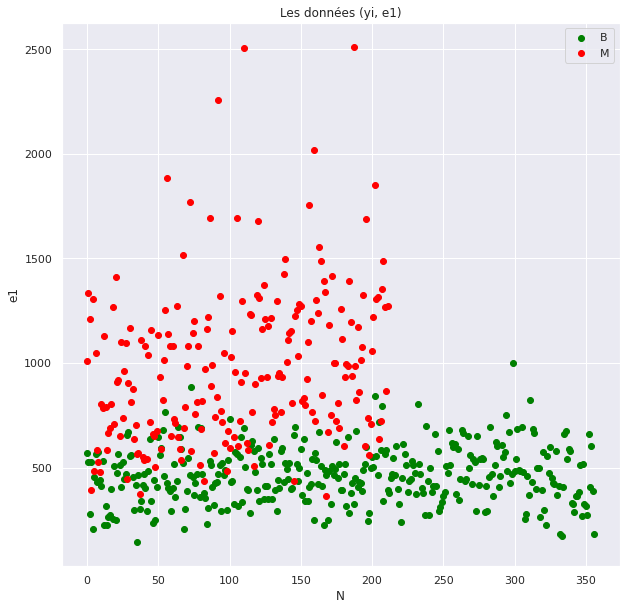

In [165]:
new_results_e1 = new_results[['e1', 'diagnosis']]
new_results_e2 = new_results[['e2', 'diagnosis']]
new_results_e3 = new_results[['e3', 'diagnosis']]

fig = plt.figure(figsize = (10,10))
plt.scatter([i for i in range(len(new_results_e1[new_results_e1['diagnosis'] == 'B']['e1']))], new_results_e1[new_results_e1['diagnosis'] == 'B']['e1'], color = 'green', label = 'B')
plt.scatter([i for i in range(len(new_results_e1[new_results_e1['diagnosis'] == 'M']['e1']))], new_results_e1[new_results_e1['diagnosis'] == 'M']['e1'], color = 'red', label = 'M')
plt.xlabel("N")
plt.ylabel("e1")
plt.legend()
plt.title('Les données (yi, e1)')

Text(0.5, 1.0, 'Les données (yi, e2)')

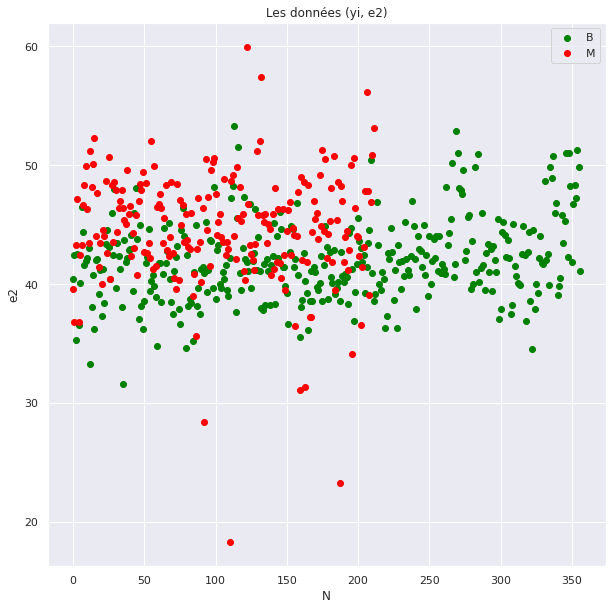

In [166]:
fig = plt.figure(figsize = (10,10))
plt.scatter([i for i in range(len(new_results_e2[new_results_e2['diagnosis'] == 'B']['e2']))], new_results_e2[new_results_e2['diagnosis'] == 'B']['e2'], color = 'green', label = 'B')
plt.scatter([i for i in range(len(new_results_e2[new_results_e2['diagnosis'] == 'M']['e2']))], new_results_e2[new_results_e2['diagnosis'] == 'M']['e2'], color = 'red', label = 'M')
plt.xlabel("N")
plt.ylabel("e2")
plt.legend()
plt.title('Les données (yi, e2)')

Text(0.5, 1.0, 'Les données (yi, e3)')

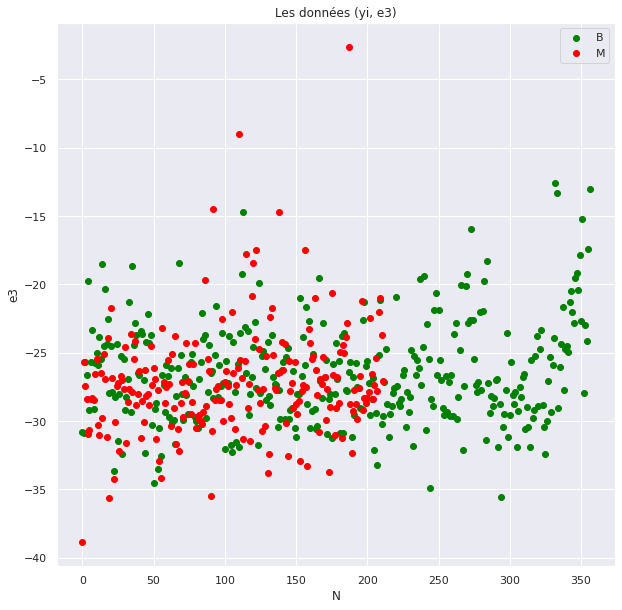

In [167]:
fig = plt.figure(figsize = (10,10))
colors = ['red', 'green', 'bleu']
plt.scatter([i for i in range(len(new_results_e3[new_results_e3['diagnosis'] == 'B']['e3']))], new_results_e3[new_results_e3['diagnosis'] == 'B']['e3'], color = 'green', label = 'B')
plt.scatter([i for i in range(len(new_results_e3[new_results_e3['diagnosis'] == 'M']['e3']))], new_results_e3[new_results_e3['diagnosis'] == 'M']['e3'], color = 'red', label = 'M')
plt.xlabel("N")
plt.ylabel("e3")
plt.legend()
plt.title('Les données (yi, e3)')

# 7. Visualiser les classes en observant les projections sur deux composantes principales $[e_1, e_2], [e_1, e_3], [e_2, e_3]$.

Text(0.5, 1.0, 'Projections sur deux composantes principales [e1, e2]')

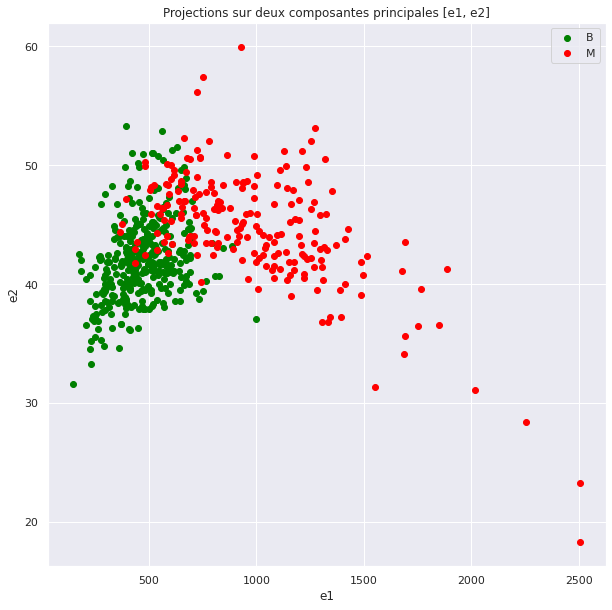

In [168]:
new_b = new_results[new_results['diagnosis'] == 'B']
new_m = new_results[new_results['diagnosis'] == 'M']
fig = plt.figure(figsize = (10,10))
colors = ['red', 'green', 'bleu']
plt.scatter(new_b['e1'], new_b['e2'], color = 'green', label = 'B')
plt.scatter(new_m['e1'], new_m['e2'], color = 'red', label = 'M')
plt.xlabel("e1")
plt.ylabel("e2")
plt.legend()
plt.title('Projections sur deux composantes principales [e1, e2]')

Text(0.5, 1.0, 'Projections sur deux composantes principales [e1, e3]')

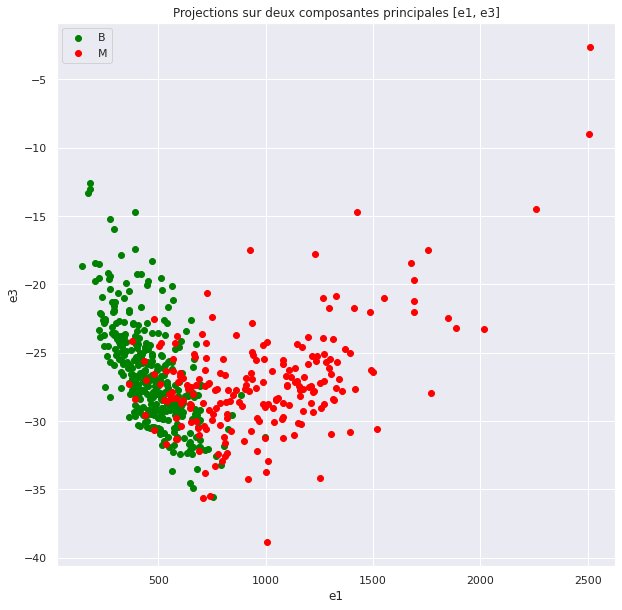

In [169]:
fig = plt.figure(figsize = (10,10))
plt.scatter(new_b['e1'], new_b['e3'], color = 'green', label = 'B')
plt.scatter(new_m['e1'], new_m['e3'], color = 'red', label = 'M')
plt.xlabel("e1")
plt.ylabel("e3")
plt.legend()
plt.title('Projections sur deux composantes principales [e1, e3]')

Text(0.5, 1.0, 'Projections sur deux composantes principales [e2, e3]')

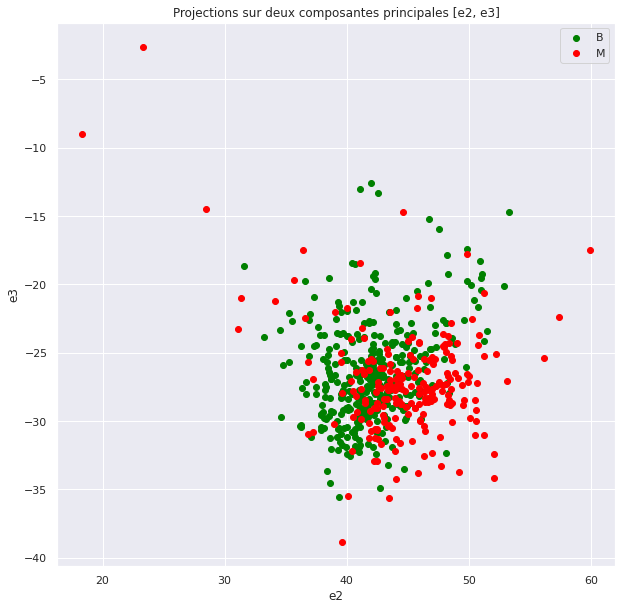

In [170]:
fig = plt.figure(figsize = (10,10))
plt.scatter(new_b['e2'], new_b['e3'], color = 'green', label = 'B')
plt.scatter(new_m['e2'], new_m['e3'], color = 'red', label = 'M')
plt.xlabel("e2")
plt.ylabel("e3")
plt.legend()
plt.title('Projections sur deux composantes principales [e2, e3]')

# 8. Effectuer une analyse linéaire discriminante.
# 9. Visualiser la frontière de décision.

In [171]:
import matplotlib as mpl
from matplotlib import colors

def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.plot(figsize = (6,6))
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 'B'], tp[y == 'M']
    X0, X1 = X[y == 'B'], X[y == 'M']
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # cellules B:
    # '.' correct classification
    # 'x' pas correct classification
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # cellules M:
     # '.' correct classification
    # 'x' pas correct classification
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099" # dark blue
    )  

    # class B and M : frontière
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black")
    return splot

Text(0, 0.5, 'e2')

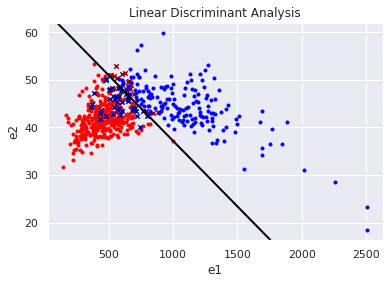

In [172]:
X = np.array(new_results[['e1', 'e2']])
y = new_results['diagnosis']

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index= 1)
plt.axis("tight")
plt.xlabel('e1')
plt.ylabel('e2')

Rouge - les cellules bénignes

Blue - les cellules malignes

Text(0, 0.5, 'e3')

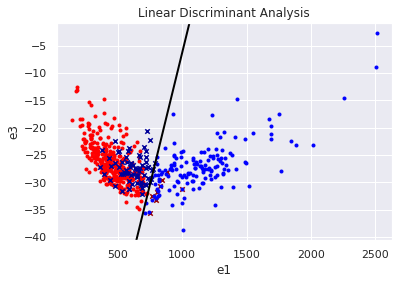

In [173]:
X = np.array(new_results[['e1', 'e3']])
y = new_results['diagnosis']

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index= 1)
plt.axis("tight")
plt.xlabel('e1')
plt.ylabel('e3')

Rouge - les cellules bénignes

Blue - les cellules malignes

Text(0, 0.5, 'e3')

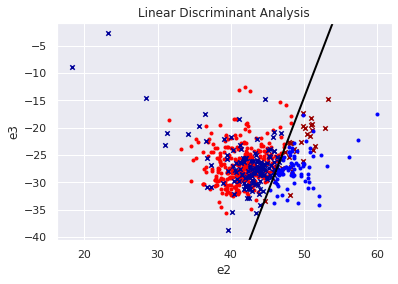

In [174]:
X = np.array(new_results[['e2', 'e3']])
y = new_results['diagnosis']

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index= 1)
plt.axis("tight")
plt.xlabel('e2')
plt.ylabel('e3')

Rouge - les cellules bénignes

Blue - les cellules malignes

# 10. Effectuer une analyse quadratique discriminante
# 11. Visualiser la frontière de décision.

Text(0, 0.5, 'e2')

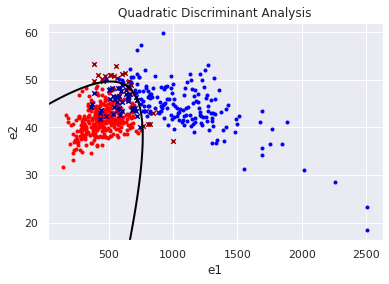

In [175]:
# Quadratic Discriminant Analysis
X = np.array(new_results[['e1', 'e2']])
y = new_results['diagnosis']

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index=2)
plt.axis("tight")
plt.xlabel('e1')
plt.ylabel('e2')

Rouge - les cellules bénignes

Blue - les cellules malignes

Text(0, 0.5, 'e3')

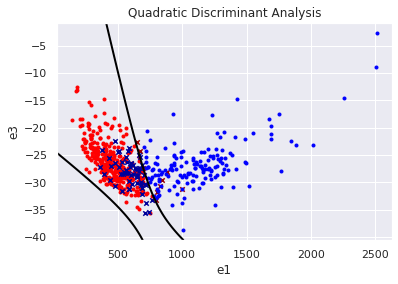

In [176]:
# Quadratic Discriminant Analysis
X = np.array(new_results[['e1', 'e3']])
y = new_results['diagnosis']

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index=2)
plt.axis("tight")
plt.xlabel('e1')
plt.ylabel('e3')

Rouge - les cellules bénignes

Blue - les cellules malignes

Text(0, 0.5, 'e3')

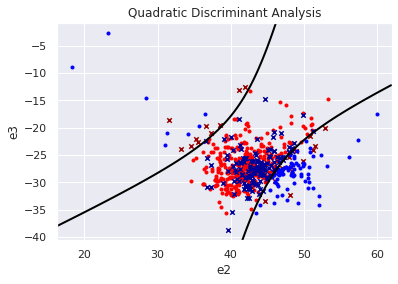

In [177]:
# Quadratic Discriminant Analysis
X = np.array(new_results[['e2', 'e3']])
y = new_results['diagnosis']

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index=2)
plt.axis("tight")
plt.xlabel('e2')
plt.ylabel('e3')

Rouge - les cellules bénignes

Blue - les cellules malignes

# 12. Calculer par validation croisée la précision et le rappel des analyses discriminantes linéaires et quadratiques.

In [178]:
#LinearDiscriminantAnalysis
accuracy = np.zeros(10)
recall = np.zeros(10)
i = 0
cv = StratifiedKFold(n_splits = 10)
X = np.array(new_results[['e1', 'e2', 'e3']])
y = new_results['diagnosis']
clf = LinearDiscriminantAnalysis()
for train, test in cv.split(X, y):
    #print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf.fit(X_train, y_train)
    y_results = clf.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_results)
    recall[i]= recall_score(y_test, y_results, average="binary", pos_label='M') 
    i = i + 1
print("LinearDiscriminantAnalysis, Accuracy values:", accuracy.mean())
print("LinearDiscriminantAnalysis, Recall values:", recall.mean())

LinearDiscriminantAnalysis, Accuracy values: 0.8980263157894737
LinearDiscriminantAnalysis, Recall values: 0.8173160173160173


In [179]:
#QuadraticDiscriminantAnalysis
accuracy = np.zeros(10)
recall = np.zeros(10)
i = 0
cv = StratifiedKFold(n_splits = 10)
X = np.array(new_results[['e1', 'e2', 'e3']])
y = new_results['diagnosis']
clf = QuadraticDiscriminantAnalysis()
for train, test in cv.split(X, y):
    #print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf.fit(X_train, y_train)
    y_results = clf.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_results)
    recall[i]= recall_score(y_test, y_results, average="binary", pos_label='M') 
    i = i + 1
print("QuadraticDiscriminantAnalysis, Accuracy values:", accuracy.mean())
print("QuadraticDiscriminantAnalysis, Recall values:", recall.mean())

QuadraticDiscriminantAnalysis, Accuracy values: 0.8998120300751878
QuadraticDiscriminantAnalysis, Recall values: 0.7787878787878788


# 13. Construire pour les deux classifieurs la matrice de confusion.

In [180]:
#LinearDiscriminantAnalysis
cv = StratifiedKFold(n_splits = 10)
X = np.array(new_results[['e1', 'e2', 'e3']])
y = new_results['diagnosis']
clf = LinearDiscriminantAnalysis()
conf_mat = np.zeros(4).reshape(2, 2)
i = 0
for train, test in cv.split(X, y):
    #print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf.fit(X_train, y_train)
    y_results = clf.predict(X_test)
    conf_mat += confusion_matrix(y_test, y_results, labels=["B", "M"])
    i = i + 1
print("LinearDiscriminantAnalysis, La matrice de confusion pour:\n", conf_mat / i)

LinearDiscriminantAnalysis, La matrice de confusion pour:
 [[33.8  1.9]
 [ 3.9 17.3]]


In [181]:
#QuadraticDiscriminantAnalysis
cv = StratifiedKFold(n_splits = 10)
X = np.array(new_results[['e1', 'e2', 'e3']])
y = new_results['diagnosis']
clf = QuadraticDiscriminantAnalysis()
conf_mat = np.zeros(4).reshape(2, 2)
i = 0
for train, test in cv.split(X, y):
    #print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf.fit(X_train, y_train)
    y_results = clf.predict(X_test)
    conf_mat += confusion_matrix(y_test, y_results, labels=["B", "M"])
    i = i + 1
print("QuadraticDiscriminantAnalysis, La matrice de confusion pour:\n", conf_mat / i)

QuadraticDiscriminantAnalysis, La matrice de confusion pour:
 [[34.7  1. ]
 [ 4.7 16.5]]
